## Procesamiento general

* **Se importan librerias**



In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import cv2 as cv

* **Se carga imagen**

In [78]:
imagen = cv.imread('IMAGEN_KMEANS.png')

Se reduce el tamaño de la imagen para reducir el tiempo de ejecución de los algoritmos

In [79]:
(h, w) = imagen.shape[:2]
nuevo_ancho = 100
ratio = h / w
nueva_altura = int(nuevo_ancho * ratio)

imagen = cv.resize(imagen, (nuevo_ancho, nueva_altura))

Se corrige el color de la imagen y se visualiza

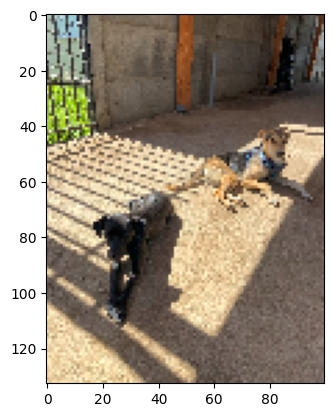

In [80]:
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)
plt.imshow(imagen)
plt.show()

Se convierte la imagen a un formato de dos dimensiones

In [81]:
imagen_algoritmo = imagen.reshape(-1,3)

* **Se determina la cantidad de clusters**

Obtención de inercias

In [82]:
inertias = []
K = range (3, 16)
for k in K:
  kmeans = cluster.KMeans(n_clusters=k, random_state=1, init="k-means++", n_init="auto")
  kmeans.fit(imagen_algoritmo)
  inertias.append(kmeans.inertia_)

Grafico de inercias

C:\Users\forel\AppData\Local\Temp\ipykernel_15332\24257408.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, inertias, "bo-", marker="o")


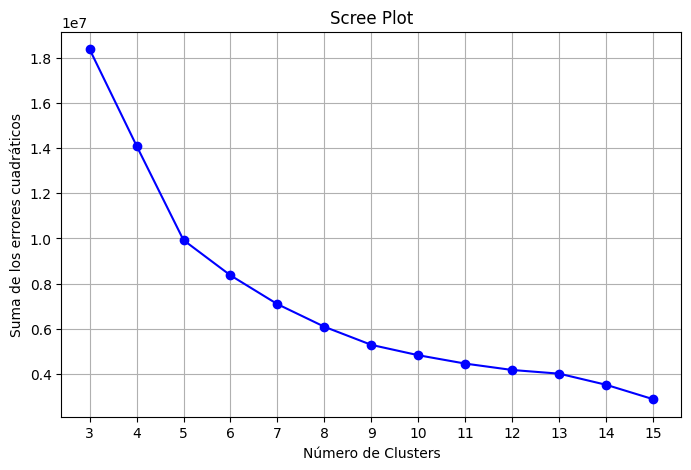

In [83]:
plt.figure(figsize=(8,5))
plt.plot(K, inertias, "bo-", marker="o")
plt.xlabel("Número de Clusters")
plt.ylabel("Suma de los errores cuadráticos")
plt.title("Scree Plot")
plt.xticks(K)
plt.grid(True)
plt.show()

Mediante este grafico determinamos que la cantidad de clusters será 3 ya que en el tercer punto se produce un quiebre significativo

In [84]:
clusters = 3

Se crea función para visualizar paleta de colores

In [85]:
def visualizar_paleta(colores):
  paleta_colores = colores / 255.0
  numero_colores = paleta_colores.shape[0]
  paleta_imagen = np.tile(paleta_colores.reshape(1, numero_colores, 3), (50, 1, 1))
  plt.imshow(paleta_imagen)
  plt.axis("off")
  plt.title("Paleta de colores")
  plt.show()

## Aplicación del algoritmo Kmeans

* **Se realiza clustering**

In [86]:
kmeans = cluster.KMeans(n_clusters=clusters ,random_state=1, init="k-means++", n_init="auto")
kmeans.fit(imagen_algoritmo)

KMeans(n_clusters=3, random_state=1)

* **Se obtienen la paleta de colores**

In [87]:
nuevos_colores  = np.uint8(kmeans.cluster_centers_)
etiquetas = kmeans.labels_

Mediante la aplicación del algoritmo kmeans se obtiene una paleta de 3 colores, los cuales corresponden a los centros de los 3 clusters en que se ha dividido la imagen

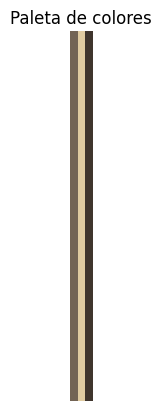

In [88]:
visualizar_paleta(nuevos_colores)

* **Se restaura la imagen con los nuevos colores**

In [89]:
imagen_kmeans = nuevos_colores[etiquetas.flatten()]
imagen_kmeans = imagen_kmeans.reshape(imagen.shape)

Se muestran las imagenes

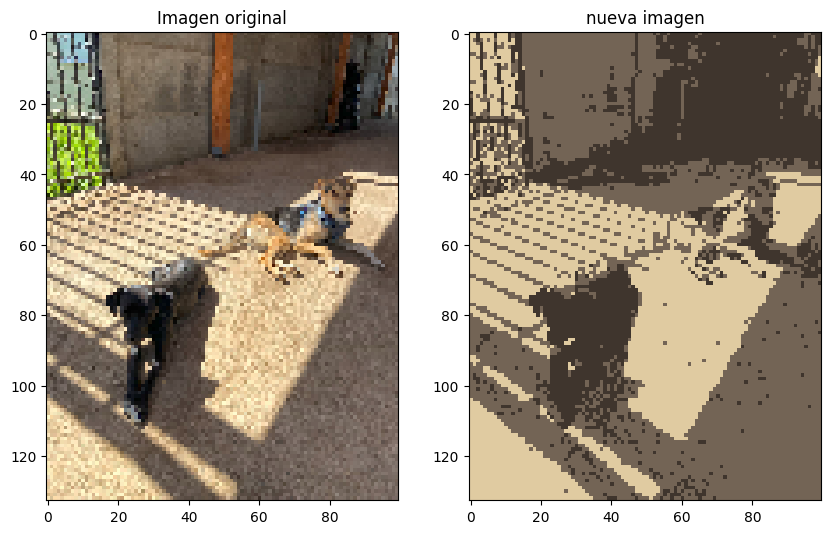

In [90]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title("Imagen original")

plt.subplot(1, 2, 2)
plt.imshow(imagen_kmeans)
plt.title("nueva imagen")

plt.show()

## Aplicación del algoritmo de Claustering Jerarquico

Se aplica el algoritmo de clustering jerarquico

In [91]:
clustering = AgglomerativeClustering(n_clusters = clusters, metric = 'euclidean', linkage ='average')
clustering.fit_predict(imagen_algoritmo)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

Se obtienen los nuevos colores

In [92]:
nuevos_colores = np.array([np.mean(imagen_algoritmo[clustering.labels_ == i], axis=0) for i in range(8)])

C:\Users\forel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\forel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


En este caso los colores corresponden a la media de cada cluster encontrado mediante la aplicación del algoritmo de Clustering jerarquico

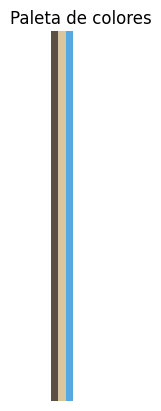

In [93]:
visualizar_paleta(nuevos_colores)

Se aplican los nuevos colores a los pixeles

In [94]:
imagen_jerarquico = nuevos_colores[clustering.labels_].reshape(imagen.shape).astype(np.uint8)

Se grafica la imagen

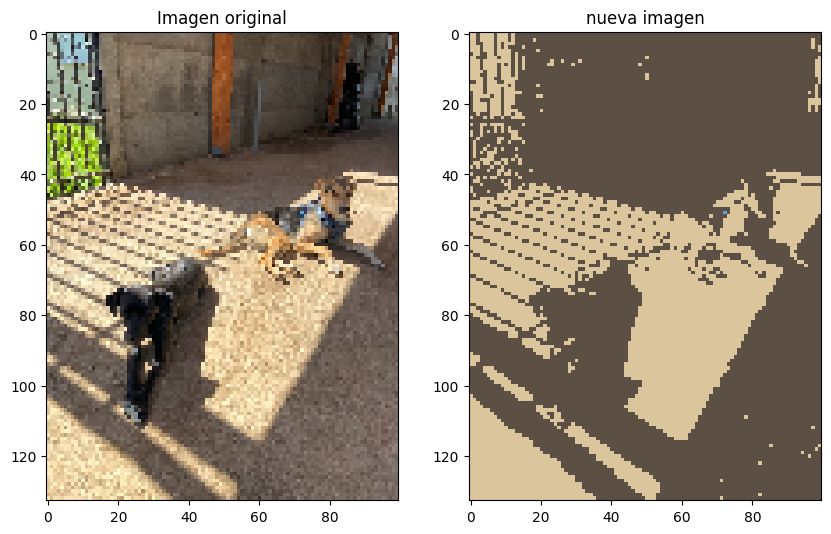

In [95]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title("Imagen original")

plt.subplot(1, 2, 2)
plt.imshow(imagen_jerarquico)
plt.title("nueva imagen")

plt.show()

## Aplicación del algoritmo Mezcla de Gausianas

* **Se realiza clustering**

In [96]:
gmm = GaussianMixture(n_components=clusters, random_state=1)
gmm.fit(imagen_algoritmo)

GaussianMixture(n_components=3, random_state=1)

* **Se obtienen la paleta de colores**

In [97]:
nuevos_colores = gmm.predict(imagen_algoritmo)
paleta = gmm.means_

Se obtiene una paleta de colores mediante mediante la aplicación del algoritimo de mezcla de gausianas, en esta paleta de colores cada color corresponde a la media de una de las gausianas

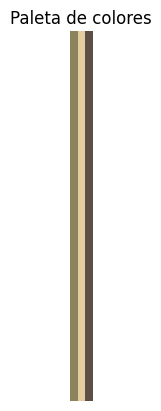

In [98]:
visualizar_paleta(paleta)

* **Se restaura la imagen con los nuevos colores**

In [99]:
imagen_gausiana = paleta[nuevos_colores].reshape(imagen.shape).astype(np.uint8)

Se grafica la imagen

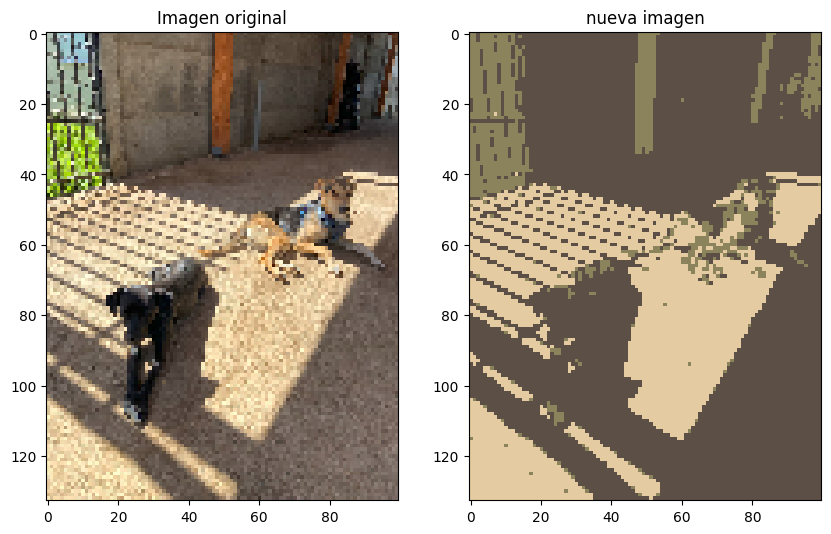

In [100]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title("Imagen original")

plt.subplot(1, 2, 2)
plt.imshow(imagen_gausiana)
plt.title("nueva imagen")

plt.show()

## Conclusión

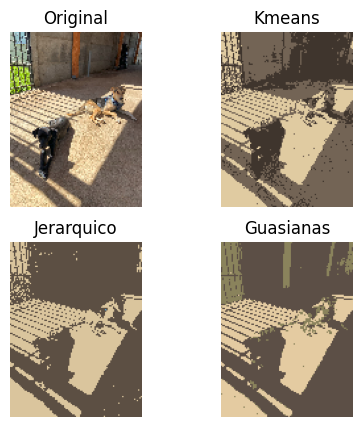

In [106]:
fig, ax = plt.subplots(2,2, figsize=(5,5))

ax[0, 0].imshow(imagen)
ax[0, 0].set_title("Original")
ax[0, 0].axis('off')

ax[0, 1].imshow(imagen_kmeans)
ax[0, 1].set_title("Kmeans")
ax[0, 1].axis('off')

ax[1, 0].imshow(imagen_jerarquico)
ax[1, 0].set_title("Jerarquico")
ax[1, 0].axis('off')

ax[1, 1].imshow(imagen_gausiana)
ax[1, 1].set_title("Guasianas")
ax[1, 1].axis('off')


plt.show()

Como se puede apreciar en esta comparación, el mejor resultado se ha obtenido utilizando el algoritmo kameans ya que con este se conservan más detalles de la imagen original siendo además este el que ha tardado menos tiempo en ejecutarse, por otra parte el peor resultado lo hemos obtenido con el clustering jerárquico el que además ha sido el más lento y el motivo de que hayamos reducido tanto el tamaño de la imagen.